In [1]:
import ast
import os
import sys

def extract_identifiers_from_file(filepath):
    try:
        with open(filepath, "r", encoding="utf-8") as file:
            tree = ast.parse(file.read(), filename=filepath)
    except (SyntaxError, UnicodeDecodeError):
        return set()  # Skip problematic files

    identifiers = set()

    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            identifiers.add(node.name)
        elif isinstance(node, ast.ClassDef):
            identifiers.add(node.name)
        elif isinstance(node, ast.Assign):
            for target in node.targets:
                if isinstance(target, ast.Name):
                    identifiers.add(target.id)
        elif isinstance(node, ast.arg):
            identifiers.add(node.arg)

    return identifiers

def extract_from_site_packages(venv_path):
    site_packages_path = None

    # Locate site-packages within the venv
    for root, dirs, _ in os.walk(os.path.join(venv_path, "lib")):
        for d in dirs:
            if d.startswith("site-packages"):
                site_packages_path = os.path.join(root, d)
                break
        if site_packages_path:
            break

    if not site_packages_path:
        print("site-packages not found. Check your venv path.")
        sys.exit(1)

    all_identifiers = set()

    for root, _, files in os.walk(site_packages_path):
        for file in files:
            if file.endswith(".py"):
                filepath = os.path.join(root, file)
                ids = extract_identifiers_from_file(filepath)
                all_identifiers.update(ids)

    return sorted(all_identifiers)

if __name__ == "__main__":
    venv_path = "./.venv"   # Change this to your venv path
    identifiers = extract_from_site_packages(venv_path)

    print(f"Total Identifiers Extracted: {len(identifiers)}")
    print("Sample Identifiers:", identifiers[:30])

    with open("venv_identifiers.txt", "w") as f:
        for ident in identifiers:
            f.write(ident + "\n")


Total Identifiers Extracted: 42001
Sample Identifiers: ['A', 'A1', 'A2', 'AARCH64', 'AArc64', 'ABAPLexer', 'ABI', 'ABORTDOC', 'ABOVE_NORMAL_PRIORITY_CLASS', 'ACCEPTED', 'ACCEPTED_ARG_HANDLERS', 'ACCEPT_CONNECTIONS_TIMEOUT', 'ACCEPT_ENCODING', 'ACCEPT_FAILED', 'ACCESS_MASK', 'ACCESS_VIOLATION_TYPE_DEP', 'ACCESS_VIOLATION_TYPE_READ', 'ACCESS_VIOLATION_TYPE_WRITE', 'ACL', 'ACL_REVISION', 'ACTIVATION_CONTEXT_STACK', 'ADDRESS64', 'ADDRESS_MODE', 'ADD_BREAKPOINT_FILE_EXCLUDED_BY_FILTERS', 'ADD_BREAKPOINT_FILE_NOT_FOUND', 'ADD_BREAKPOINT_INVALID_LINE', 'ADD_BREAKPOINT_LAZY_VALIDATION', 'ADD_BREAKPOINT_NO_ERROR', 'AFFINITY', 'AFTER_DISCONNECT']


In [2]:
import os

# --- BST Node Definition ---
class BSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# --- BST Class with Autocomplete ---
class BST:
    def __init__(self):
        self.root = None

    def autocomplete(self, prefix):
        results = []
        self._autocomplete(self.root, prefix, results)
        return results

    def _autocomplete(self, node, prefix, results):
        if not node:
            return
        if node.value.startswith(prefix):
            results.append(node.value)
        if prefix <= node.value:
            self._autocomplete(node.left, prefix, results)
        if prefix >= node.value:
            self._autocomplete(node.right, prefix, results)

# --- Build Balanced BST from Sorted Identifiers ---
def build_balanced_bst(sorted_identifiers):
    def build_recursive(start, end):
        if start > end:
            return None
        mid = (start + end) // 2
        node = BSTNode(sorted_identifiers[mid])
        node.left = build_recursive(start, mid - 1)
        node.right = build_recursive(mid + 1, end)
        return node

    bst = BST()
    bst.root = build_recursive(0, len(sorted_identifiers) - 1)
    return bst

# --- Load Identifiers from File and Build BST ---
def load_identifiers_into_balanced_bst(file_path):
    if not os.path.exists(file_path):
        print(f"File {file_path} not found.")
        return None

    with open(file_path, "r") as f:
        identifiers = [line.strip() for line in f if line.strip()]

    identifiers = sorted(set(identifiers))   # Ensure sorted & unique
    return build_balanced_bst(identifiers)

# --- Main Execution ---
if __name__ == "__main__":
    bst = load_identifiers_into_balanced_bst("venv_identifiers.txt")
    
    if bst:
        test_prefixes = ["get", "set", "data", "config", "init", "log"]

        for prefix in test_prefixes:
            suggestions = bst.autocomplete(prefix)
            print(f"\nAutocomplete suggestions for prefix '{prefix}':")
            print(suggestions[:10] if suggestions else "No suggestions found.")



Autocomplete suggestions for prefix 'get':
['get_invalidate_events', 'get_child_at', 'get_argcomplete_cwords', 'get_access_handle', 'get', 'getName', 'getDescription', 'get1', 'get0']

Autocomplete suggestions for prefix 'set':
['set_default_keyword_chars', 'set_app', 'setFailAction', 'setBreak', 'set']

Autocomplete suggestions for prefix 'data':
['data__find__where', 'data__attr', 'dataId', 'data', 'data64']

Autocomplete suggestions for prefix 'config':
['config_override_names', 'config_file', 'config', 'config_classes']

Autocomplete suggestions for prefix 'init':
['init_gui_support', 'init_connection_file', 'init_banner', 'initChars', 'init']

Autocomplete suggestions for prefix 'log':
['log_write', 'log_message', 'log_exc', 'log_counter', 'logMessage', 'log']


An error occurred during visualization: [Errno 2] No such file or directory: 'xdg-open'
Visualization source saved to bst_visualization.gv


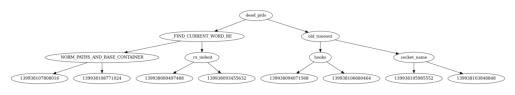

In [9]:
import graphviz
import matplotlib.pyplot as plt


def add_nodes_edges(node, dot, max_depth, current_depth=0):
    """Recursively adds nodes and edges to the Graphviz Digraph."""
    if node is None or current_depth > max_depth:
        return

    # Add the current node
    dot.node(str(id(node)), label=str(node.value))

    # Add edge and recurse for left child
    if node.left:
        dot.edge(str(id(node)), str(id(node.left)))
        add_nodes_edges(node.left, dot, max_depth, current_depth + 1)
    # Add a placeholder for missing left child if within depth
    elif current_depth < max_depth:
         dot.node(f'null_left_{id(node)}', label='None', shape='point', style='invisible')
         dot.edge(str(id(node)), f'null_left_{id(node)}', style='invisible')


    # Add edge and recurse for right child
    if node.right:
        dot.edge(str(id(node)), str(id(node.right)))
        add_nodes_edges(node.right, dot, max_depth, current_depth + 1)
    # Add a placeholder for missing right child if within depth
    elif current_depth < max_depth:
         dot.node(f'null_right_{id(node)}', label='None', shape='point', style='invisible')
         dot.edge(str(id(node)), f'null_right_{id(node)}', style='invisible')


def visualize_bst(bst_root, filename="bst_visualization", max_depth=3):
    """Creates a Graphviz visualization of the BST up to a max_depth."""
    if not bst_root:
        print("BST is empty, cannot visualize.")
        return None
        
    dot = graphviz.Digraph(comment='BST Visualization', format='png')
    dot.attr(rankdir='TB') # Top to Bottom layout
    add_nodes_edges(bst_root, dot, max_depth)
    
    try:
        dot.render(filename, view=True, cleanup=True)
        print(f"BST visualization saved to {filename}.png and opened.")
    except graphviz.backend.execute.ExecutableNotFound:
        print(f"Graphviz executable not found. Visualization saved to {filename}.gv")
        dot.save(filename + ".gv")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")
        print(f"Visualization source saved to {filename}.gv")
        dot.save(filename + ".gv")
        
    return dot # Return the dot object for potential further manipulation in the notebook

# Visualize the loaded BST (up to a certain depth to keep it manageable)
# Note: The full BST is very large (42001 nodes). 
# Visualizing the whole thing is impractical. We limit the depth.
if bst and bst.root:
    visualize_bst(bst.root, max_depth=2) 
    img = plt.imread("bst_visualization.png")
    plt.imshow(img)
    plt.axis("off")     # hide axes if it’s just an image
    plt.show()
else:
    print("BST was not loaded successfully or is empty.")